In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
from webdriver_manager.chrome import ChromeDriverManager

In [21]:
# Set up Selenium
options = Options()
#options.add_argument("--headless")  # Run in headless mode (no GUI)
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

def scrape_product_details(product_url):
    driver.get(product_url)
    
    # Extract product details
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    
    name = soup.find('span', class_='a-size-large product-title-word-break').text.strip() if soup.find('span', class_='a-size-large product-title-word-break') else 'N/A'
    price = soup.find('span', class_='a-price-whole').text.strip() if soup.find('span',class_='a-price-whole') else 'N/A'
    discount = soup.find('span', class_='a-size-large a-color-price savingPriceOverride aok-align-center reinventPriceSavingsPercentageMargin savingsPercentage').text.strip() if soup.find('span', class_='a-size-large a-color-price savingPriceOverride aok-align-center reinventPriceSavingsPercentageMargin savingsPercentage') else 'N/A'
    review = soup.find('span', class_='a-icon-alt').text.strip() if soup.find('span',class_='a-icon-alt') else 'N/A'
    rating = soup.find('span', id ='acrCustomerReviewText').text.strip() if soup.find('span',id ='acrCustomerReviewText') else 'N/A'
    description = soup.find('div', class_='a-section a-spacing-small a-spacing-top-small').text.strip() if soup.find('div', class_='a-section a-spacing-small a-spacing-top-small') else 'N/A'
   
    return {
        'Product Name': name,
        'Price': price,
        'Discount': discount,
        'Review': review,
        'Ratings': rating,
        'Description': description
    }

def scrape_mobiles(url):
    mobile_data = []
    page_count = 0  # Limit to 30 pages
    
    while url and page_count < 30:
        driver.get(url)
        
        # Scroll down to load more books
        last_height = driver.execute_script("return document.body.scrollHeight")
        
        while True:
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

            new_height = driver.execute_script("return document.body.scrollHeight")
            if new_height == last_height:
                break
            last_height = new_height

        soup = BeautifulSoup(driver.page_source, 'html.parser')
        mobiles = soup.find_all('div', class_='sg-col-inner')

        for mobile in mobies:
            try:
                # Get product link
                product_link = mobile.find('a', class_='a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal')['href']
                full_product_url = 'https://www.amazon.in' + product_link

                # Scrape product details
                product_details = scrape_product_details(full_product_url)

                # Print details
                print(product_details)
                mobile_data.append(product_details)

            except Exception as e:
                print(f"Error processing book: {e}")

        page_count += 1
 
        # Find the next page URL
        next_page = soup.find('a', class_='s-pagination-item s-pagination-next s-pagination-button s-pagination-separator')
        if next_page and 'href' in next_page.attrs:
            url = 'https://www.amazon.in' + next_page['href']
        else:
            url = None

    # Convert list to DataFrame
    df = pd.DataFrame(mobile_data)
    return df
 
# Start scraping from the first page
df_mobiles = scrape_books('https://www.amazon.in/s?i=electronics&bbn=1389432031&rh=n%3A1389432031%2Cp_89%3AApple%7CMotorola%7COnePlus%7CRedmi%7CSamsung%7CVivo%7CXiaomi%7Crealme%2Cp_36%3A-6100000&dc&qid=1728762811&rnid=1318502031&ref=sr_pg_1')
driver.quit()  # Close the browser when done

Error processing book: 'NoneType' object is not subscriptable
Error processing book: 'NoneType' object is not subscriptable
Error processing book: 'NoneType' object is not subscriptable
Error processing book: 'NoneType' object is not subscriptable
{'Product Name': 'OnePlus 12R (Iron Gray, 16GB RAM, 256GB Storage)', 'Price': '42,999.', 'Discount': '-7%', 'Review': '4.3 out of 5 stars', 'Ratings': '3,579 ratings', 'Description': 'Brand   OnePlus     Operating System   OxygenOS     RAM Memory Installed Size   16 GB     CPU Model   Snapdragon     Memory Storage Capacity   256 GB'}
{'Product Name': 'OnePlus 12R (Iron Gray, 16GB RAM, 256GB Storage)', 'Price': '42,999.', 'Discount': '-7%', 'Review': '4.3 out of 5 stars', 'Ratings': '3,579 ratings', 'Description': 'Brand   OnePlus     Operating System   OxygenOS     RAM Memory Installed Size   16 GB     CPU Model   Snapdragon     Memory Storage Capacity   256 GB'}
{'Product Name': 'Redmi Note 13 5G (Chromatic Purple, 6GB RAM, 128GB Storage)', 

In [1]:
df_mobiles

In [1]:
df_mobiles.to_csv('amazon_capstone_project.csv', index=False)
print("Data saved to amazon_capstone_project.csv")

Data saved to amazon_capstone_project.csv


In [3]:
# read csv
data = pd.read_csv('amazon_capstone_project_cleaned.csv')
data

,Brand,Product Name,Description,Colour,Operating System,Price,Discount,Actual Price,Rating,Reviews
0,OnePlus,Oneplus 12R,"Iron Gray, 16Gb Ram, 256Gb Storage",Iron Gray,OxygenOS,42999,0.07,46009,4.3,3579
1,Redmi,Redmi Note 13 5G,"Chromatic Purple, 6Gb Ram, 128Gb Storage",Chromatic Purple,MIUI,14660,0.30,19058,3.7,5287
2,Samsung,Samsung Galaxy M05,"Mint Green, 4Gb Ram, 64 Gb Storage",Mint Green,Snapdragon,6499,0.35,8774,3.8,154
3,Apple,Apple Iphone 13,128 Gb,Grey Shimmer,iOS,43999,0.26,55439,4.5,30031
4,OnePlus,Oneplus Nord Ce4 Lite 5G,"Super Silver, 8Gb Ram, 128Gb Storage",Super Silver,OxygenOS,19998,0.05,20998,4.1,2304
...,...,...,...,...,...,...,...,...,...,...
692,Xiaomi,Xiaomi Redmi Note 7,"3Gb 32Gb , Sapphire Blue",Grey Shimmer,Android,6099,0.00,6099,3.9,58
693,Redmi,Redmi Note 12 Pro 5G,"Stardust Purple, 12Gb Ram, 256Gb Storage",Stardust Purple,MIUI,25999,0.19,30939,4.2,209
694,OnePlus,Oneplus 11R 5G,"Solar Red, 8Gb Ram, 128Gb Storage",Solar Red,OxygenOS,26999,0.00,26999,4.2,60
695,Redmi,Redmi Note 12,"Lunar Black, 6Gb Ram, 64Gb Storage",Lunar Black,MIUI,9490,0.00,9490,4.0,3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             697 non-null    object 
 1   Product Name      697 non-null    object 
 2   Description       697 non-null    object 
 3   Colour            697 non-null    object 
 4   Operating System  697 non-null    object 
 5   Price             697 non-null    int64  
 6   Discount          697 non-null    float64
 7   Actual Price      697 non-null    int64  
 8   Rating            697 non-null    float64
 9   Reviews           697 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 54.6+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,697.0,20561.441894,11671.170770,115.0,11999.00,17599.00,26498.00,59900.00
Discount,697.0,0.198278,0.146235,0.0,0.08,0.21,0.28,0.92
Actual Price,697.0,24714.771879,14462.427933,115.0,14666.00,20889.00,32228.00,74875.00
Rating,697.0,3.872884,0.515085,1.0,3.70,4.00,4.10,5.00
Reviews,697.0,3731.562410,17276.700256,1.0,26.00,168.00,1139.00,248935.00



### Price Insights
- **Mean Price**: The average price of the items is approximatey$20,561.44, indicating a relatively high pricing tier
- - **Range**: Prices range fRs o $115Rs t $59,900, suggesting a diverse product range, possibly catering to different market segments.
- **Standard Deviation**: A high standard deviation f $11,671.17 indicates significant variability in pricing, likely due to the presence of luxury items.

### Discount Insights
- **Mean Discount**: The average discount is around 19.83%, which is substantial and may attract price-sensitive customers.
- **Range**: Discounts vary from 0% to 92%, indicating some items are deeply discounted, while others retain their full price.
- **Distribution**: The 75th percentile at 28% shows that a significant portion of items offer discounts above 20%.

### Actual Price Insights
- **Mean Actual Price**: The mean actual pribeforeter discount is about $24,714.77, indicating that discounts are signific.ts.
- **Comparison to Price**: The actual price being higher than the mean price suggests that many items originally prihigher.tantiaRatingounts.

### Review Insights
- **Mean* Review rating*: The average review score is 3.87, indicating genera room .for improRating
- **Range**: Reviews range from 1 to 5, showing a spectrum of customer satisfaction. The majority seem to cluster around the higher end, as the median is 4.00.
- **Standard Deviation**: The relatively low standard deviation (0.515) suggests that while there areratingsow scores, most reviews are fhance overall satisfaction.

In [6]:
data.describe(include='object').T

,count,unique,top,freq
Brand,697,8,realme,175
Product Name,697,278,Redmi Note 13 Pro,18
Description,697,589,128 Gb,7
Colour,697,314,Grey Shimmer,36
Operating System,697,11,Android,282


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

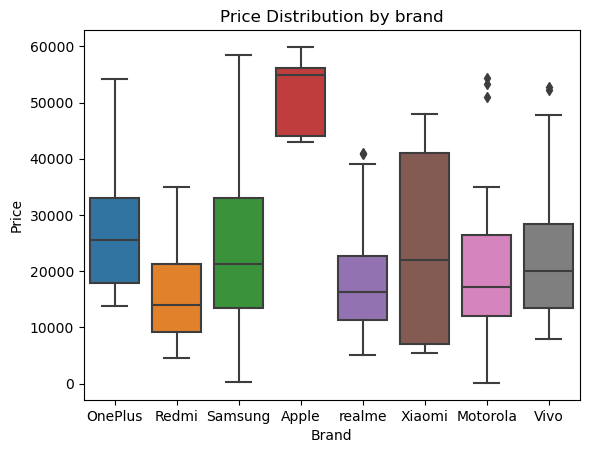

In [8]:
sns.boxplot(x='Brand', y='Price', data=data)
plt.title('Price Distribution by brand')
plt.show()

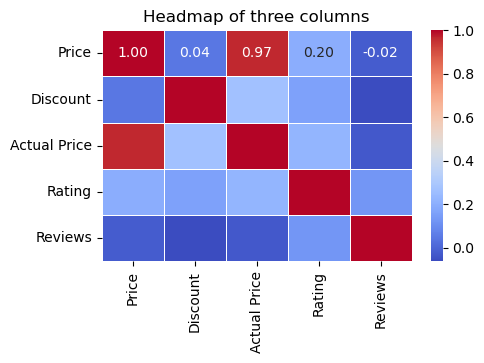

In [9]:
# Select specific columns
selected_columns = ['Price','Discount','Actual Price','Rating','Reviews']
df_selected = data[selected_columns]

# Compute the correlation matrix (if needed)
correlation_matrix = df_selected.corr()

# Plot the heatmap
plt.figure(figsize=(5,3))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', linewidth =.5,fmt=".2f")
plt.title("Headmap of three columns")
plt.show()

In [10]:
df_selected.corr()

,Price,Discount,Actual Price,Rating,Reviews
Price,1.000000,0.044798,0.966690,0.198813,-0.020804
Discount,0.044798,1.000000,0.267053,0.160504,-0.062184
Actual Price,0.966690,0.267053,1.000000,0.222422,-0.029448
Rating,0.198813,0.160504,0.222422,1.000000,0.128234
Reviews,-0.020804,-0.062184,-0.029448,0.128234,1.000000


Discount: Shows a moderate correlation with actual price (0.267), suggesting that higher-priced items tend to have some discounts.<br>
Rating and Price: A weak positive correlation (0.199) implies that higher-priced items may have slightly better ratings.<br>
Reviews: Displays weak correlations with other variables, indicating that the number of reviews does not significantly impact ratings, price, or discounts.

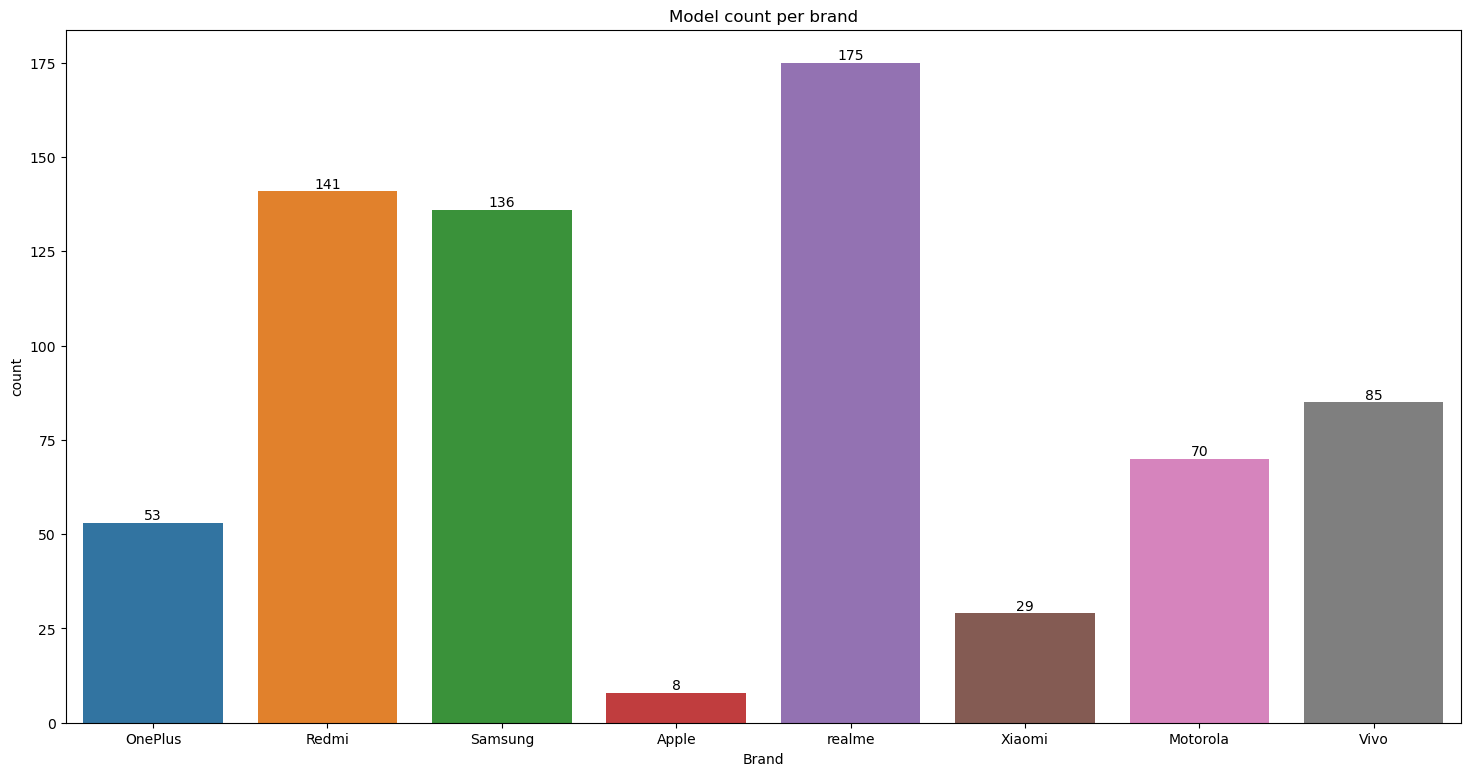

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(x='Brand', data=data)
ax.bar_label(ax.containers[0])
plt.title("Model count per brand")
plt.show()
plt.clf()

In [11]:
average = data.groupby('Brand')['Price'].mean().reset_index()
average = round(average, 2)
average

,Brand,Price
0,Apple,51961.75
1,Motorola,18816.53
2,OnePlus,26760.28
3,Redmi,15699.67
4,Samsung,24664.32
5,Vivo,22056.61
6,Xiaomi,23758.59
7,realme,17419.24


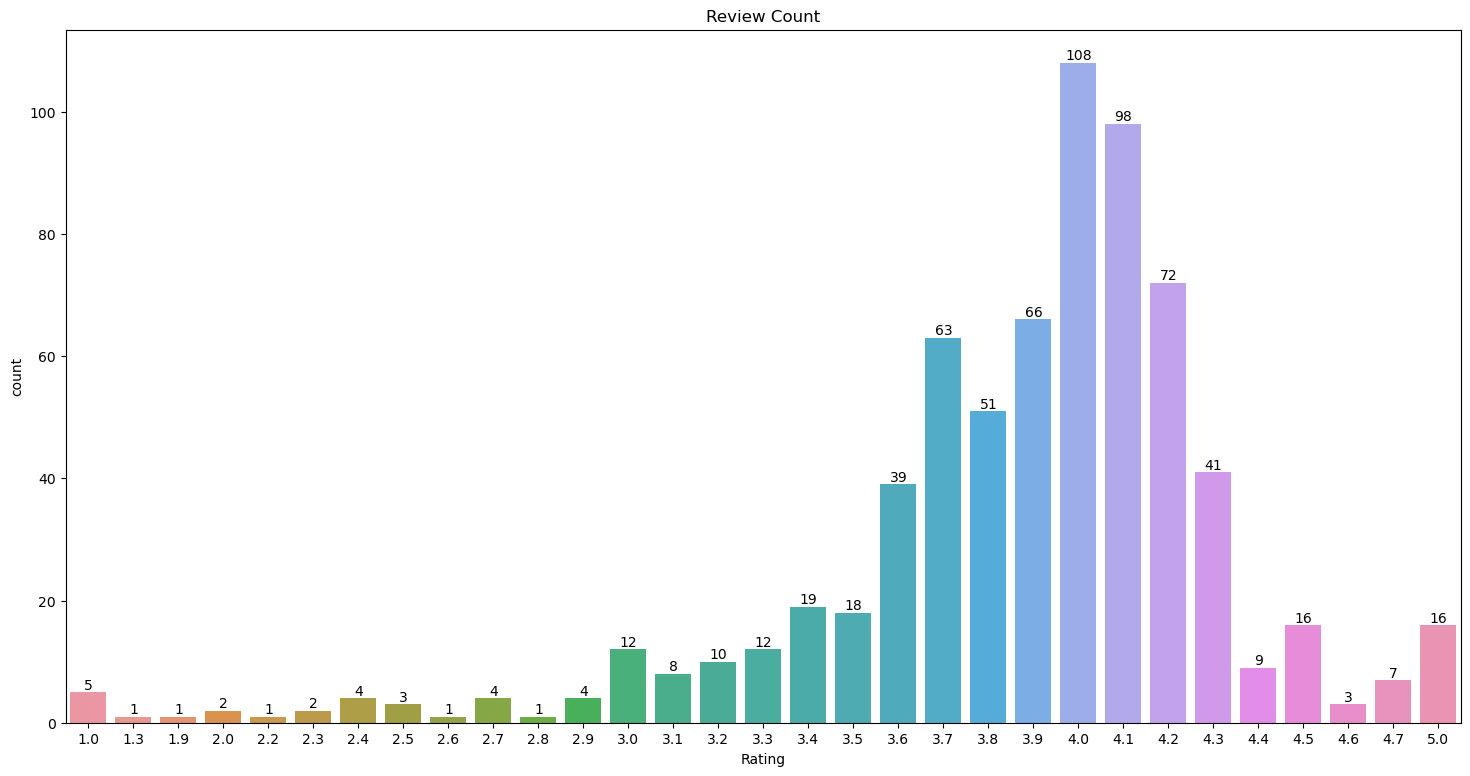

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(x='Rating', data=data)
ax.bar_label(ax.containers[0])
plt.title("Review Count")
plt.show()
plt.clf()

In [13]:
average_rating = data.groupby('Brand')['Rating'].mean().reset_index()
average_rating = round(average_rating, 2)
average_rating

,Brand,Rating
0,Apple,4.50
1,Motorola,3.80
2,OnePlus,3.79
3,Redmi,3.84
4,Samsung,3.85
5,Vivo,3.94
6,Xiaomi,3.80
7,realme,3.92


In [14]:
review = data.groupby('Brand')['Reviews'].sum().reset_index()
review

,Brand,Reviews
0,Apple,196322
1,Motorola,36307
2,OnePlus,369382
3,Redmi,762835
4,Samsung,962320
5,Vivo,56222
6,Xiaomi,70116
7,realme,147395


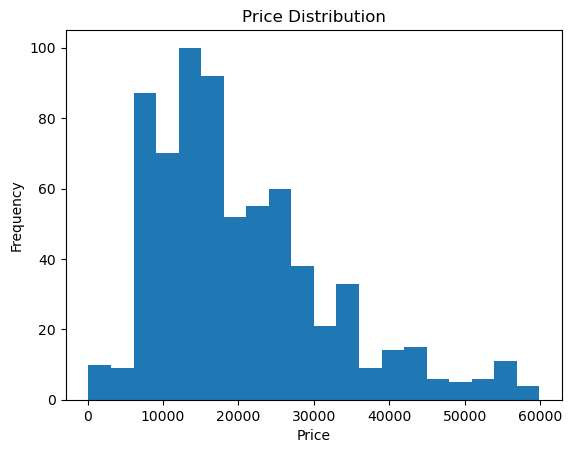

In [46]:
# Histogram
plt.hist(data['Price'], bins=20)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [18]:
brand_stats = data.groupby('Brand').agg({'Price': 'mean', 'Rating': 'mean', 'Reviews': 'sum'})
brand_stats

,Price,Rating,Reviews
Brand,,,
Apple,51961.750000,4.500000,196322
Motorola,18816.528571,3.801429,36307
OnePlus,26760.283019,3.792453,369382
Redmi,15699.666667,3.836879,762835
Samsung,24664.323529,3.852941,962320
Vivo,22056.611765,3.940000,56222
Xiaomi,23758.586207,3.796552,70116
realme,17419.240000,3.921714,147395


# Oneway ANOVA

* __Null Hypothesis (H0):__<br>
    There are no differences in average ratings across the different smartphone brands.
* __Alternative Hypothesis (H1):__<br>
    At least one brand has a different average rating.

In [35]:
from scipy import stats

# Group ratings by brand
grouped_data = [data[data['Brand'] == brand]['Rating'] for brand in data['Brand'].unique()]

# Perform ANOVA
f_stat, p_value = stats.f_oneway(*grouped_data)

# Print results
print("F-statistic:", f_stat)
print("P-value:", p_value)

if p_value <= 0.05:
    print("Reject the null hypothesis: There is a significant difference in ratings among the brands.")
else:
    print("Fail to reject the null hypothesis: No significant difference in ratings among the brands.")


F-statistic: 2.768896804387577
P-value: 0.007630698033693263
Reject the null hypothesis: There is a significant difference in ratings among the brands.


In [38]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the model
model = ols('Rating ~ C(Brand)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Post-hoc test (Tukey's HSD)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(data['Rating'], data['Brand'])
print(tukey)


              sum_sq     df         F    PR(>F)
C(Brand)    5.052474    7.0  2.768897  0.007631
Residual  179.605030  689.0       NaN       NaN
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
   Apple Motorola  -0.6986 0.0064 -1.2779 -0.1193   True
   Apple  OnePlus  -0.7075 0.0067 -1.2963 -0.1188   True
   Apple    Redmi  -0.6631  0.009 -1.2273  -0.099   True
   Apple  Samsung  -0.6471 0.0123 -1.2118 -0.0823   True
   Apple     Vivo    -0.56 0.0618  -1.134   0.014  False
   Apple   Xiaomi  -0.7034 0.0137 -1.3233 -0.0836   True
   Apple   realme  -0.5783  0.038 -1.1395 -0.0171   True
Motorola  OnePlus   -0.009    1.0 -0.2916  0.2737  False
Motorola    Redmi   0.0355 0.9998 -0.1915  0.2624  False
Motorola  Samsung   0.0515 0.9974 -0.1768  0.2798  False
Motorola     Vivo   0.1386 0.6993  -0.112  0.3891  False
Motorola   Xiaomi  -0.0049    1.0 -0.3477  0.3379  False
M

__ANOVA Test__ Results

p-value (PR(>F)): 
0.007631

Since this p-value is less than the common significance level of 0.05, <BR> you reject the null hypothesis.<BR> This suggests that there are significant differences in average ratings among the different brands.<BR>

Tukey HSD Results
The Tukey HSD test provides a detailed comparison of means between all pairs of groups:

Significant Comparisons (reject = True)

Non-Significant Comparisons (reject = False)

Comparisons involving Motorola, OnePlus, Redmi, Samsung, Vivo, Xiaomi, and realme did not show significant differences in their ratings.
Interpretation
The results indicate that Apple has significantly lower ratings compared to several other brands.
Other brands did not show significant differences among themselves.

## Push data to MySQL

In [142]:
#pip install mysql-connector-python pandas

In [148]:
import pandas as pd
import mysql.connector
from mysql.connector import errorcode

# Load the cleaned dataset
data = pd.read_csv('amazon_capstone_project_cleaned.csv')

# MySQL database connection
config = {
    "user": "root",
    "password": "Prasanth@24",
    "host": "localhost",
    "database": "product_db",
    "raise_on_warnings": True
}

try:
    # Connect to the database
    connection = mysql.connector.connect(**config)
    cursor = connection.cursor()

    # Insert data into the Products table
    for index, row in data.iterrows():
        cursor.execute("""
            INSERT INTO Products (`Brand`, `Product Name`, `Description`, `Colour`, `Operating System`, `Price`, `Discount`, `Actual Price`, `Rating`, `Reviews`)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        """, (
            row['Brand'],
            row['Product Name'],  
            row['Description'],
            row['Colour'],
            row['Operating System'],  
            row['Price'],
            row['Discount'],
            row['Actual Price'],  
            row['Rating'],
            row['Reviews']
        ))

    # Commit the transaction
    connection.commit()

except mysql.connector.Error as err:
    if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Something is wrong with your user name or password")
    elif err.errno == errorcode.ER_BAD_DB_ERROR:
        print("Database does not exist")
    else:
        print(err)
finally:
    cursor.close()
    connection.close()
